In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# EDA

In [2]:
data=pd.read_csv("Student_Performance.csv")
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: xlabel='Performance Index', ylabel='Previous Scores'>

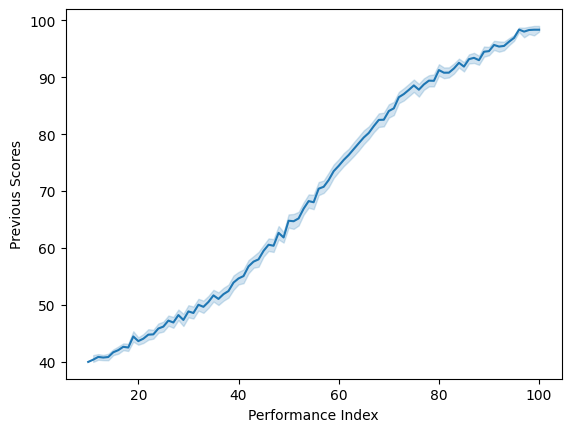

In [3]:
sns.lineplot(x="Performance Index",y="Previous Scores",data=data)

<Axes: xlabel='Performance Index', ylabel='Hours Studied'>

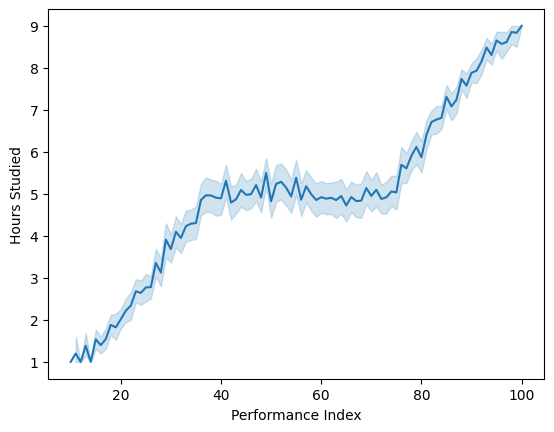

In [4]:
sns.lineplot(x="Performance Index",y="Hours Studied",data=data)

In [5]:
le=LabelEncoder()

In [6]:
data["Extracurricular Activities"]=le.fit_transform(data["Extracurricular Activities"])

In [7]:
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Model : Random Forest Regressor

In [8]:
rfr=RandomForestRegressor(n_estimators=10)

In [9]:
x=data.drop(["Performance Index"],axis=1)
y=data["Performance Index"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [12]:
y_pred=rfr.predict(x_test)

# Actual Values VS Predicted Values

In [13]:
table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test-y_pred
})

In [14]:
table

,Actual,Predicted,Residual
6252,51.0,56.200000,-5.200000
4684,20.0,21.800000,-1.800000
1731,46.0,45.800000,0.200000
4742,28.0,30.066667,-2.066667
4521,41.0,42.000000,-1.000000
...,...,...,...
6412,45.0,48.600000,-3.600000
8285,66.0,64.400000,1.600000
7853,16.0,15.000000,1.000000
1095,65.0,62.600000,2.400000


# Model Evaluation

In [15]:
score=r2_score(y_test,y_pred)
print(score*100)

98.51623248817276
